In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import cv2 
import os 

In [2]:
import os 
FOLDER_PATH = '../Bijie-landslide-dataset'
IMG_LANDSLIDE_PATH  = os.path.join(FOLDER_PATH,'landslide/image')
DEM_LANDSLIDE_PATH = os.path.join(FOLDER_PATH,'landlside/dem')
MASK_LANDSLIDE_PATH = os.path.join(FOLDER_PATH,'landslide/mask')
BOUNDARY_LANDSLIDE_PATH=os.path.join(FOLDER_PATH,'landslide/polygon_coordinate')

In [3]:
img_path_list = os.listdir(IMG_LANDSLIDE_PATH)
boundary_path_list = [img_path.replace('.png','.txt') for img_path in img_path_list]

In [12]:
def read_boundary_file(file_path:str)->list:
    """
    Read boundary text file, return boundaries (x,y) list 
    ### Arguments: 
        None 
    ### Returns:
        List of boundary points 
    """
    l = list()
    with open(file_path,'r') as f:
        lines = f.readlines()
        for idx,line in enumerate(lines):
            if idx>1:
                # first data start from line 3 
                line = line.strip() 
                x,y = line.split(' ')
                x = float(x)
                y = float(y)
                l.append([x,y])

    l = np.array(l[:-1],dtype=np.int32).reshape(-1,1,2)
    return l



In [40]:
def draw_boundary(img:np.ndarray,boundaries:list)->np.ndarray:
    """
    Draw boundaries into image
    ### Arguments:
        img(np.ndarray): opencv image to be drawn 
        boundaries(list): point list of boundaries in an image
    ### Returns:
        images with boundaries
    """
    if len(boundaries)>0:
        # print('img.shape',img.shape,'boundaries.shape',boundaries.shape)
        # cv2.fillPoly(img,[boundaries],(0,0,255),thickness=3)
        cv2.polylines(img, [boundaries], isClosed=True, color=(0, 0, 255), thickness=2, lineType=cv2.LINE_4)
        img = cv2.resize(img,(200,200))
    return img 



In [58]:
def visualize_for_paper(img_path_list:list[str],boundary_path_list:list[str])->None:
    """
    Draw image for paper
    ### Arguments:
        img_path_list(list[str]): List of all image 
        boundary_path_list(list[str]): List of boundary 
    ### Returns:
        None but display 6x6 random image with red boundary 
    """
    rnd_idxs = np.arange(len(img_path_list))
    np.random.shuffle(rnd_idxs)
    rows,cols  = (8,8)
    # Create a figure
    fig = plt.figure(figsize=(10, 10))
    # Create a GridSpec with 2 rows and 2 columns
    gs = fig.add_gridspec(rows,cols, wspace=0.1, hspace=0.1)
    plt.figure(figsize=(500,500))
    for r in range(rows):
        for c in range(cols):
            idx = r*rows+c 
            img_path = os.path.join(IMG_LANDSLIDE_PATH,img_path_list[idx])
            boundary_path = os.path.join(BOUNDARY_LANDSLIDE_PATH,boundary_path_list[idx])
            img = cv2.imread(img_path)
            boundaries = read_boundary_file(boundary_path)
            img = draw_boundary(img=img,boundaries=boundaries)
            ax = fig.add_subplot(gs[r,c])
            ax.axis('off')
            ax.imshow(img)

    plt.tight_layout() 
    plt.show() 
        






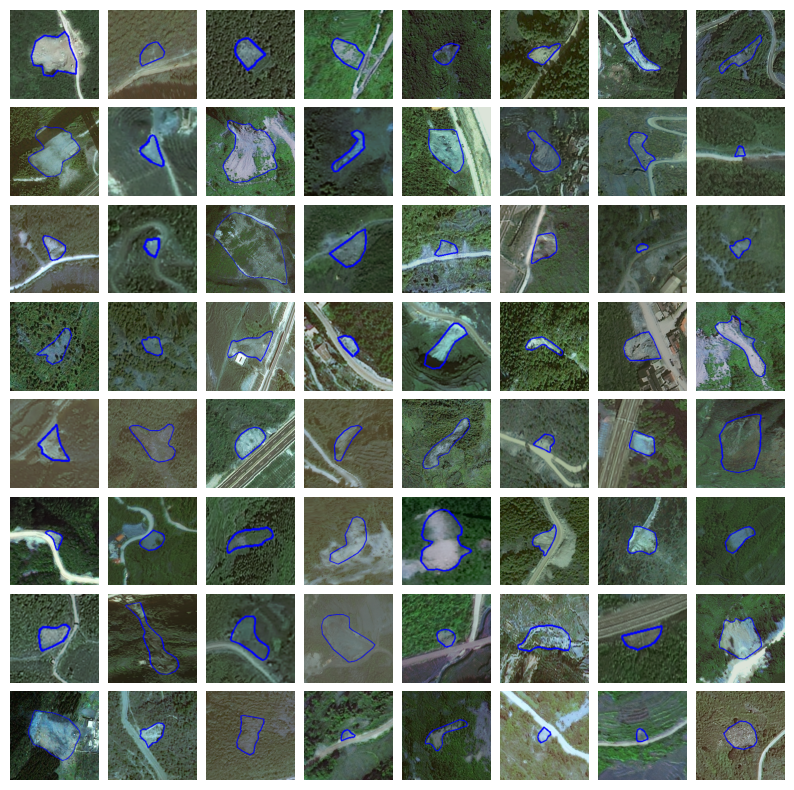

<Figure size 50000x50000 with 0 Axes>

In [59]:
visualize_for_paper(img_path_list=img_path_list,boundary_path_list=boundary_path_list)